In [8]:
%pylab inline
from sklearn.neighbors import KNeighborsRegressor
# import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [9]:
def add_const(X):
    X = np.array(X, float)
    X = np.hstack((X, np.ones((X.shape[0], 1), float)))
    return X

def ols(X, y):
    X = add_const(X)
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y.reshape(-1, 1))
    return beta
def ols_err(X, y, x_test, y_test):
    beta = ols(X, y)
#     print(beta.shape, x_test.shape)
    x_test = add_const(x_test)
    err = np.dot(x_test, beta)-y_test
#     print("beta: ", beta)
#     print("ols err: ", err)
    return err

In [10]:
def knn(X, y):
    return KNeighborsRegressor(
        n_neighbors=1, weights='uniform', algorithm='auto',
        leaf_size=30, p=2, metric='minkowski', metric_params=None, 
        n_jobs=2).fit(X, y)
def knn_err(X, y, x_test, y_test):
    knn_ = knn(X, y)
    err = knn_.predict(x_test)-y_test
#     print("knn err: ", err)
    return err

In [11]:
def f1(X):
    X = np.array(X, float)
    return X[:, 0]
def f3(X):
    X = np.array(X, float)
    return 0.5*(X[:, 0]+1)**3

def add_noise(y, varnoise):
    y = np.array(y, float)
    return y+np.random.randn(*y.shape)*varnoise
    

In [12]:
def mse(data):
    return np.mean(np.square(data))

In [18]:
n_sample = 500
varnoise = 1.0
n_test = 100

ols_err_list = []
knn_err_list = []
dims = []
for n_dim in range(1, 11):
    print("n_dim: ", n_dim)
    dims.append(n_dim)
    ols_err_list_ = []
    knn_err_list_ = []
    for i_test in range(n_test):
        # generate training set
        X = np.random.rand(n_sample, n_dim)
        y1 = add_noise(f1(X), varnoise)
        x_test = np.zeros((1, n_dim))
        y_test = f1(x_test)
#         print(y_test)

        ols_err_list_.append(ols_err(X, y1, x_test, y_test))
        knn_err_list_.append(knn_err(X, y1, x_test, y_test))
#     print(ols_err_list_)
#     print(knn_err_list_)
    ols_err_list.append(mse(ols_err_list_))
    knn_err_list.append(mse(knn_err_list_))


n_dim:  1
n_dim:  2
n_dim:  3
n_dim:  4
n_dim:  5
n_dim:  6
n_dim:  7
n_dim:  8
n_dim:  9
n_dim:  10


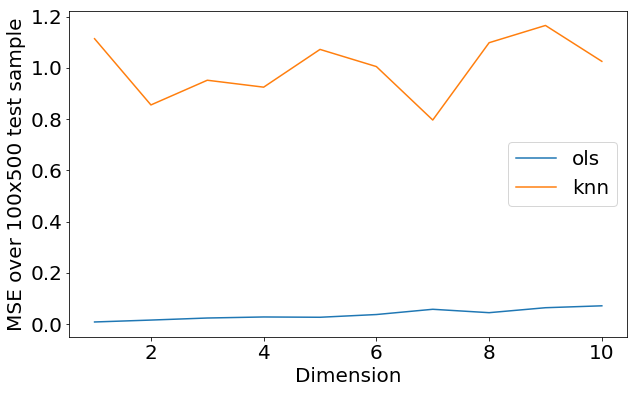

In [19]:
rcParams['font.size'] = 20
figure(figsize=(10, 6));
plot(dims, ols_err_list, label="ols")
plot(dims, knn_err_list, label="knn")
xlabel("Dimension")
ylabel("MSE over {}x{} test sample".format(n_test, n_sample))
legend();